This notebook serves as a way to generate the plots necessary for analysis of OTU data. First, we use a standard dataframe analysis package known as "pandas".

In [2]:
import pandas as pd
import numpy as np

Excel is not a preferred format, so convert to csv and then read in.

In [3]:
feature = pd.read_csv('feature-table.csv')

In [4]:
taxonomy = pd.read_csv('taxonomy-silva.tsv', sep='\t')

In [5]:
feature

,#OTU ID,GA2,GA5,GA6,GA8,GD1,GD2,GD3,GD5,GD6,...,PA3,PD7,PF,PW,pla_w2,PA6,PD5,GA1,GControl,PControl
0,106ecf8b1971449001359790a679cf96b5aed7ce,18421.0,12633.0,6699.0,22770.0,16068.0,7299.0,285.0,25075.0,32015.0,...,0.0,4257.0,55.0,41.0,144.0,16653.0,6.0,2.0,0.0,0.0
1,ba993fa9ec1f9552af58a965e341cce2440f33ac,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,03a9c0e9f16821041cdadfa495a2c174aa2aa19e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7a4e3ac67e992bcd74b453e97d6413464cf224a8,0.0,35.0,0.0,1.0,899.0,1307.0,479.0,56.0,0.0,...,4.0,8.0,2.0,9.0,0.0,0.0,0.0,1.0,64.0,57.0
4,a94c3dfa1d5bb1f0f04a552d3559895499d2e0f8,0.0,120.0,0.0,116.0,18.0,22.0,29.0,69.0,2.0,...,0.0,0.0,2.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6763,102c37e9555e21511cfbcef017fe0e18fcfbdd2e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
6764,d2c7ebdda2a403d633ff732cb7c80c8395d4e788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
6765,8ad12eaf2d66a1ecd81607c3b06514c97354df36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
6766,c152beaca5a6d7b267056d8456f8c3559591506d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0


In [6]:
taxonomy

,Feature ID,Taxon,Confidence
0,106ecf8b1971449001359790a679cf96b5aed7ce,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.954306
1,ba993fa9ec1f9552af58a965e341cce2440f33ac,d__Bacteria,0.806283
2,03a9c0e9f16821041cdadfa495a2c174aa2aa19e,Unassigned,0.377068
3,7a4e3ac67e992bcd74b453e97d6413464cf224a8,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.931641
4,a94c3dfa1d5bb1f0f04a552d3559895499d2e0f8,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.995161
...,...,...,...
6763,f92c8451d4a053da6e073490156b0eee55e1d068,d__Bacteria; p__Bacteroidota; c__Bacteroidia; ...,0.999999
6764,fb53df60284bafa331ec434699c9effe10bcef40,d__Bacteria; p__Patescibacteria; c__Saccharimo...,0.867081
6765,fc8a8fec9661069dd9d534b858254d32e394407c,d__Eukaryota,0.872733
6766,fd0bcf1eddb8fde7a0e15da5d0071c71cbba2e9a,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.998765


We will merge these two dataframes into one by joining on their Feature IDs (formerly called OTUs, but qiime 2.0 is moving towards the "Feature ID" designate)

In [7]:
feature=feature.rename(columns={"#OTU ID":'Feature ID'})
df = pd.merge(feature, taxonomy, how='outer')

In [8]:
df

,Feature ID,GA2,GA5,GA6,GA8,GD1,GD2,GD3,GD5,GD6,...,PF,PW,pla_w2,PA6,PD5,GA1,GControl,PControl,Taxon,Confidence
0,106ecf8b1971449001359790a679cf96b5aed7ce,18421.0,12633.0,6699.0,22770.0,16068.0,7299.0,285.0,25075.0,32015.0,...,55.0,41.0,144.0,16653.0,6.0,2.0,0.0,0.0,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.954306
1,ba993fa9ec1f9552af58a965e341cce2440f33ac,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,d__Bacteria,0.806283
2,03a9c0e9f16821041cdadfa495a2c174aa2aa19e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unassigned,0.377068
3,7a4e3ac67e992bcd74b453e97d6413464cf224a8,0.0,35.0,0.0,1.0,899.0,1307.0,479.0,56.0,0.0,...,2.0,9.0,0.0,0.0,0.0,1.0,64.0,57.0,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.931641
4,a94c3dfa1d5bb1f0f04a552d3559895499d2e0f8,0.0,120.0,0.0,116.0,18.0,22.0,29.0,69.0,2.0,...,2.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.995161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6763,102c37e9555e21511cfbcef017fe0e18fcfbdd2e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,d__Bacteria; p__Proteobacteria; c__Alphaproteo...,0.765778
6764,d2c7ebdda2a403d633ff732cb7c80c8395d4e788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,d__Bacteria; p__Deinococcota; c__Deinococci; o...,0.971267
6765,8ad12eaf2d66a1ecd81607c3b06514c97354df36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,d__Bacteria; p__Patescibacteria; c__Parcubacte...,0.999953
6766,c152beaca5a6d7b267056d8456f8c3559591506d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,d__Bacteria; p__Verrucomicrobiota; c__Verrucom...,0.873744


We have decided to rename some of the designates to make it easier to understand what is going on. First we look at what these samples were named.

In [9]:
df.columns

Index(['Feature ID', 'GA2', 'GA5', 'GA6', 'GA8', 'GD1', 'GD2', 'GD3', 'GD5',
       'GD6', 'GD7', 'GD8', 'GF', 'PA2', 'PA5', 'PD1', 'PD3', 'PD6', 'PD8',
       'grd_w2', 'grd_w1', 'pla_w1', 'GD4', 'PA8', 'PD2', 'GA4', 'GA7', 'PA1',
       'PA7', 'GA3', 'GW', 'PA4', 'PD4', 'PA3', 'PD7', 'PF', 'PW', 'pla_w2',
       'PA6', 'PD5', 'GA1', 'GControl', 'PControl', 'Taxon', 'Confidence'],
      dtype='object')

And now we rename them.

In [10]:
df = df.rename(columns={"grd_w1": "GW-A", "pla_w1": "PW-A","grd_w2": "GW+A", "pla_w2": "PW+A", "GW" : "GW+B", "PW":"PW+B", "GControl" : "GW-B", "PControl" : "PW-B", "PF": "PF+B", "GF": "GF+B"})
df

,Feature ID,GA2,GA5,GA6,GA8,GD1,GD2,GD3,GD5,GD6,...,PF+B,PW+B,PW+A,PA6,PD5,GA1,GW-B,PW-B,Taxon,Confidence
0,106ecf8b1971449001359790a679cf96b5aed7ce,18421.0,12633.0,6699.0,22770.0,16068.0,7299.0,285.0,25075.0,32015.0,...,55.0,41.0,144.0,16653.0,6.0,2.0,0.0,0.0,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.954306
1,ba993fa9ec1f9552af58a965e341cce2440f33ac,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,d__Bacteria,0.806283
2,03a9c0e9f16821041cdadfa495a2c174aa2aa19e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unassigned,0.377068
3,7a4e3ac67e992bcd74b453e97d6413464cf224a8,0.0,35.0,0.0,1.0,899.0,1307.0,479.0,56.0,0.0,...,2.0,9.0,0.0,0.0,0.0,1.0,64.0,57.0,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.931641
4,a94c3dfa1d5bb1f0f04a552d3559895499d2e0f8,0.0,120.0,0.0,116.0,18.0,22.0,29.0,69.0,2.0,...,2.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.995161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6763,102c37e9555e21511cfbcef017fe0e18fcfbdd2e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,d__Bacteria; p__Proteobacteria; c__Alphaproteo...,0.765778
6764,d2c7ebdda2a403d633ff732cb7c80c8395d4e788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,d__Bacteria; p__Deinococcota; c__Deinococci; o...,0.971267
6765,8ad12eaf2d66a1ecd81607c3b06514c97354df36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,d__Bacteria; p__Patescibacteria; c__Parcubacte...,0.999953
6766,c152beaca5a6d7b267056d8456f8c3559591506d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,d__Bacteria; p__Verrucomicrobiota; c__Verrucom...,0.873744


Everything looks straightforward except for taxonomy. What is going on there? Let's look at the first entry to see what's going on.

In [11]:
print(df['Taxon'][0])

d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Vibrionales; f__Vibrionaceae; g__Vibrio


Oh! We have all the taxonomic classifications squashed into one cell. Well, let's separate them out, shall we?

In [12]:
def add_taxonomy(df):
    df["Domain"] = None
    df["Phylum"] = None
    df["Class"] = None
    df["Order"] = None
    df["Family"] = None
    df["Genus"] = None
    df["Species"] = None
    for ind,instance in df.iterrows():
        taxo = instance['Taxon']
        array_of_taxo = taxo.split(';')
        for thing in array_of_taxo:
            divide = thing.split('__')
            if divide[0].strip() == 'd':
                df.at[ind,'Domain'] = str(divide[1])
            if divide[0].strip() == 'p':
                df.at[ind,'Phylum'] = str(divide[1])
            if divide[0].strip() == 'c':
                df.at[ind,'Class'] = str(divide[1])
            if divide[0].strip() == 'o':
                df.at[ind,'Order'] = str(divide[1])
            if divide[0].strip() == 'f':
                df.at[ind,'Family'] = str(divide[1])
            if divide[0].strip() == 'g':
                df.at[ind,'Genus'] = str(divide[1])
            if divide[0].strip() == 's':
                df.at[ind,'Species'] = str(divide[1])
    return df
        

In [13]:
df = add_taxonomy(df)

Now, let's re-examine the dataframe with everything separated out to see if it makes more sense.

In [14]:
df

,Feature ID,GA2,GA5,GA6,GA8,GD1,GD2,GD3,GD5,GD6,...,PW-B,Taxon,Confidence,Domain,Phylum,Class,Order,Family,Genus,Species
0,106ecf8b1971449001359790a679cf96b5aed7ce,18421.0,12633.0,6699.0,22770.0,16068.0,7299.0,285.0,25075.0,32015.0,...,0.0,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.954306,Bacteria,Proteobacteria,Gammaproteobacteria,Vibrionales,Vibrionaceae,Vibrio,None
1,ba993fa9ec1f9552af58a965e341cce2440f33ac,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,d__Bacteria,0.806283,Bacteria,None,None,None,None,None,None
2,03a9c0e9f16821041cdadfa495a2c174aa2aa19e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Unassigned,0.377068,None,None,None,None,None,None,None
3,7a4e3ac67e992bcd74b453e97d6413464cf224a8,0.0,35.0,0.0,1.0,899.0,1307.0,479.0,56.0,0.0,...,57.0,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.931641,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,None,None
4,a94c3dfa1d5bb1f0f04a552d3559895499d2e0f8,0.0,120.0,0.0,116.0,18.0,22.0,29.0,69.0,2.0,...,0.0,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.995161,Bacteria,Proteobacteria,Gammaproteobacteria,Vibrionales,Vibrionaceae,Vibrio,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6763,102c37e9555e21511cfbcef017fe0e18fcfbdd2e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,d__Bacteria; p__Proteobacteria; c__Alphaproteo...,0.765778,Bacteria,Proteobacteria,Alphaproteobacteria,Caulobacterales,Hyphomonadaceae,Hyphomonas,None
6764,d2c7ebdda2a403d633ff732cb7c80c8395d4e788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,d__Bacteria; p__Deinococcota; c__Deinococci; o...,0.971267,Bacteria,Deinococcota,Deinococci,Deinococcales,Deinococcaceae,Deinococcus,Deinococcus_budaensis
6765,8ad12eaf2d66a1ecd81607c3b06514c97354df36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,d__Bacteria; p__Patescibacteria; c__Parcubacte...,0.999953,Bacteria,Patescibacteria,Parcubacteria,Candidatus_Moranbacteria,Candidatus_Moranbacteria,Candidatus_Moranbacteria,uncultured_bacterium
6766,c152beaca5a6d7b267056d8456f8c3559591506d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,d__Bacteria; p__Verrucomicrobiota; c__Verrucom...,0.873744,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Verrucomicrobiales,Rubritaleaceae,Rubritalea,uncultured_bacterium


We would like to consider some interesting subsets of the data. Prior metadata sorting is important in these projects.

In [15]:
labels = ['GW-A','PW-A','GW+A','PW+A','GW+B','PW+B','GW-B','PW-B','GF+B','PF+B',\
          'GA1','GA2','GA3','GA4','GA5','GA6','GA7','GA8','PA1','PA2','PA3','PA4','PA5','PA6','PA7','PA8',\
          'GD1','GD2','GD3','GD4','GD5','GD6','GD7','GD8','PD1','PD2','PD3','PD4','PD5','PD6','PD7','PD8']
aerobic = ['GA1','GA2','GA5','GA6','GD1','GD2','GD5','GD6','PA1','PA2','PA5','PA6','PD1','PD2','PD5','PD6']
anaerobic = ['GA3','GA4','GA7','GA8','GD3','GD4','GD7','GD8','PA3','PA4','PA7','PA8','PD3','PD4','PD7','PD8']
cool = ['GA1','GA3','GA5','GA7','GD1','GD3','GD5','GD7','PA1','PA3','PA5','PA7','PD1','PD3','PD5','PD7']
warm = ['GA2','GA4','GA6','GA8','GD2','GD4','GD6','GD8','PA2','PA4','PA6','PA8','PD2','PD4','PD6','PD8']
tsa = ['GA1','GA2','GA3','GA4','GD1','GD2','GD3','GD4','PA1','PA2','PA3','PA4','PD1','PD2','PD3','PD4']
ma = ['GA5','GA6','GA7','GA8','GD5','GD6','GD7','GD8','PA5','PA6','PA7','PA8','PD5','PD6','PD7','PD8']
aerosols = ['GA1','GA2','GA3','GA4','GA5','GA6','GA7','GA8','PA1','PA2','PA3','PA4','PA5','PA6','PA7','PA8']
aerosol_control = ['GW+B', 'PW+B', 'GW+A', 'PW+A']
dispersed = ['GD1','GD2','GD3','GD4','GD5','GD6','GD7','GD8','PD1','PD2','PD3','PD4','PD5','PD6','PD7','PD8']
dispersed_control = ['GF+B','PF+B']
grand = ['GA1','GA2','GA3','GA4','GA5','GA6','GA7','GA8','GD1','GD2','GD3','GD4','GD5','GD6','GD7','GD8']
granda = ['GA1','GA2','GA3','GA4','GA5','GA6','GA7','GA8']
grandd = ['GD1','GD2','GD3','GD4','GD5','GD6','GD7','GD8']
plank = ['PA1','PA2','PA3','PA4','PA5','PA6','PA7','PA8','PD1','PD2','PD3','PD4','PD5','PD6','PD7','PD8']
planka = ['PA1','PA2','PA3','PA4','PA5','PA6','PA7','PA8']
plankd = ['PD1','PD2','PD3','PD4','PD5','PD6','PD7','PD8']
ma_aerobic = ['GA5','GA6','PA5','PA6']
ma_anaerobic = ['GA7','GA8','PA7','PA8']
warm_anaerobic = ['GA4','GA8','PA4','PA8']
aerosol_aerobic = ['GA1','GA2','GA5','GA6','PA1','PA2','PA5','PA6']
aerosol_anaeobic = ['GA3','GA4','GA7','GA8','PA3','PA4','PA7','PA8']
foam_aerobic = ['GD1','GD2','GD5','GD6','PD1','PD2','PD5','PD6']
foam_anaeobic = ['GD3','GD4','GD7','GD8','PD3','PD4','PD7','PD8']
cool_anaerobic = ['GA3','GA7','PA3','PA7']
control_water_main = ['GW+B','PW+B']
control_foam_main = ['GF+B','PF+B']
grandctr = ['GW+A','GW+B']
plankctr = ['PW+A','PW+B']
during = ['GW+A','PW+A','GW+B','PW+B','GF+B','PF+B']
surface_water = ['GW-A','PW-A','GW+A','PW+A','GW+B','PW+B','GW-B','PW-B']
postcontrol = ['GW-B','PW-B']
aeratoroff = ['GW-A','PW-A','GW-B','PW-B']
all_controls = ['GW-A','PW-A','GW+A','PW+A','GW+B','PW+B','GW-B','PW-B','GF+B','PF+B']
Grand_Aerosols_Controls = ['GA1','GA2','GA3','GA4','GA5','GA6','GA7','GA8','GW+B','GW+A']
Plank_Aerosols_Controls = ['PA1','PA2','PA3','PA4','PA5','PA6','PA7','PA8','PW+B','PW+A']
Grand_Foams_Controls = ['GD1','GD2','GD3','GD4','GD5','GD6','GD7','GD8','GW+B', 'GW+A', 'GF+B']
Plank_Foams_Controls = ['PD1','PD2','PD3','PD4','PD5','PD6','PD7','PD8','PW+B', 'PW+A', 'PF+B'] 

Reorder the cells so that they are grouped in a human-readable order.

In [16]:
df = df[['Feature ID', 'GW-A','PW-A','GW+A','PW+A','GW+B','PW+B','GW-B','PW-B','GF+B','PF+B',\
        'GA1','GA2','GA3','GA4','GA5','GA6','GA7','GA8','PA1','PA2','PA3','PA4','PA5','PA6','PA7','PA8',\
        'GD1','GD2','GD3','GD4','GD5','GD6','GD7','GD8','PD1','PD2','PD3','PD4','PD5','PD6','PD7','PD8',\
        'Taxon','Confidence','Domain','Phylum','Class','Order','Family','Genus','Species']]
df

,Feature ID,GW-A,PW-A,GW+A,PW+A,GW+B,PW+B,GW-B,PW-B,GF+B,...,PD8,Taxon,Confidence,Domain,Phylum,Class,Order,Family,Genus,Species
0,106ecf8b1971449001359790a679cf96b5aed7ce,0.0,0.0,111.0,144.0,39.0,41.0,0.0,0.0,354.0,...,695.0,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.954306,Bacteria,Proteobacteria,Gammaproteobacteria,Vibrionales,Vibrionaceae,Vibrio,None
1,ba993fa9ec1f9552af58a965e341cce2440f33ac,236.0,207.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,d__Bacteria,0.806283,Bacteria,None,None,None,None,None,None
2,03a9c0e9f16821041cdadfa495a2c174aa2aa19e,56.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Unassigned,0.377068,None,None,None,None,None,None,None
3,7a4e3ac67e992bcd74b453e97d6413464cf224a8,563.0,399.0,2.0,0.0,38.0,9.0,64.0,57.0,14.0,...,0.0,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.931641,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,None,None
4,a94c3dfa1d5bb1f0f04a552d3559895499d2e0f8,0.0,0.0,15.0,5.0,0.0,2.0,0.0,0.0,7.0,...,33386.0,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.995161,Bacteria,Proteobacteria,Gammaproteobacteria,Vibrionales,Vibrionaceae,Vibrio,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6763,102c37e9555e21511cfbcef017fe0e18fcfbdd2e,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,d__Bacteria; p__Proteobacteria; c__Alphaproteo...,0.765778,Bacteria,Proteobacteria,Alphaproteobacteria,Caulobacterales,Hyphomonadaceae,Hyphomonas,None
6764,d2c7ebdda2a403d633ff732cb7c80c8395d4e788,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,d__Bacteria; p__Deinococcota; c__Deinococci; o...,0.971267,Bacteria,Deinococcota,Deinococci,Deinococcales,Deinococcaceae,Deinococcus,Deinococcus_budaensis
6765,8ad12eaf2d66a1ecd81607c3b06514c97354df36,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,d__Bacteria; p__Patescibacteria; c__Parcubacte...,0.999953,Bacteria,Patescibacteria,Parcubacteria,Candidatus_Moranbacteria,Candidatus_Moranbacteria,Candidatus_Moranbacteria,uncultured_bacterium
6766,c152beaca5a6d7b267056d8456f8c3559591506d,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,d__Bacteria; p__Verrucomicrobiota; c__Verrucom...,0.873744,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Verrucomicrobiales,Rubritaleaceae,Rubritalea,uncultured_bacterium


Great! One thing we might want to do is look at the most common classifications. We'll do that by sorting.

In [17]:
df.sort_values(list(labels), ascending=[False]*len(labels))

,Feature ID,GW-A,PW-A,GW+A,PW+A,GW+B,PW+B,GW-B,PW-B,GF+B,...,PD8,Taxon,Confidence,Domain,Phylum,Class,Order,Family,Genus,Species
74,ac1ee3642d9352cb7d3ba82afc4c229fd4b29d08,8737.0,4735.0,4.0,3.0,2.0,0.0,215.0,309.0,22.0,...,0.0,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.999995,Bacteria,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Moraxellaceae,Acinetobacter,None
63,e90263babeaef51da1f2bcac2a87eaeeb89b9ee4,4153.0,3130.0,171.0,64.0,0.0,0.0,529.0,444.0,7.0,...,0.0,d__Bacteria; p__Proteobacteria; c__Alphaproteo...,0.780508,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,Pseudorhodobacter,None
21,0d479416f15489b3a5eb1289228e430a7a3deb37,2856.0,3418.0,1061.0,2321.0,3.0,0.0,6156.0,6523.0,14.0,...,0.0,d__Bacteria; p__Bacteroidota; c__Bacteroidia; ...,0.999998,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,Flavobacterium,None
61,c5dd5090fa99ca6e5d6c6107d83631514e0c85c0,1475.0,2078.0,11.0,19.0,4.0,0.0,429.0,450.0,58.0,...,0.0,d__Bacteria; p__Proteobacteria; c__Alphaproteo...,0.852146,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,Sulfitobacter,None
132,8eca6a790651cb6e87de1a8aa1a0131cf628aae4,1297.0,899.0,0.0,1.0,0.0,0.0,152.0,290.0,8.0,...,0.0,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.999357,Bacteria,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Pseudomonadaceae,Pseudomonas,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5376,14da84994bd4a84182b1157d4c6d93de3df63de8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.995272,Bacteria,Proteobacteria,Gammaproteobacteria,Vibrionales,Vibrionaceae,Vibrio,None
5377,4f11d75e438d27e0aa52ca160c9c3e79f7acd18e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.953747,Bacteria,Proteobacteria,Gammaproteobacteria,Vibrionales,Vibrionaceae,Vibrio,None
5378,00e4f220d485d8f6f7d7eac876d9ca61928e2ac6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.985875,Bacteria,Proteobacteria,Gammaproteobacteria,Vibrionales,Vibrionaceae,Vibrio,None
5380,52a78b38006025bd461690f3359ab18558cd0630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,d__Bacteria; p__Proteobacteria; c__Gammaproteo...,0.972631,Bacteria,Proteobacteria,Gammaproteobacteria,Vibrionales,Vibrionaceae,Vibrio,None


Here is a check to make sure that the Silva classification is not failing in the same way that the Greengenes classification fails for VIbrio.

In [18]:
pseudo = df[df['Family']=='Pseudoalteromonadaceae']
pseudo[pseudo['Genus'] == 'Vibrio']

,Feature ID,GW-A,PW-A,GW+A,PW+A,GW+B,PW+B,GW-B,PW-B,GF+B,...,PD8,Taxon,Confidence,Domain,Phylum,Class,Order,Family,Genus,Species


And what if we wanted to know all the Phylum that have been identified?

In [19]:
print(df['Phylum'].unique())

['Proteobacteria' None 'Campilobacterota' 'Firmicutes' 'Bacteroidota'
 'Actinobacteriota' 'Cyanobacteria' 'Bdellovibrionota' 'Desulfobacterota'
 'Spirochaetota' 'Patescibacteria' 'Fusobacteriota' 'Thermotogota'
 'Fibrobacterota' 'Acidobacteriota' 'Verrucomicrobiota' 'LCP-89' 'WPS-2'
 'Phragmoplastophyta' 'Myxococcota' 'Nanoarchaeota' 'Latescibacterota'
 'Cloacimonadota' 'Elusimicrobiota' 'Synergistota' 'Ascomycota'
 'Nitrospirota' 'Sumerlaeota' 'Dependentiae' 'NKB15' 'Planctomycetota'
 'SAR324_clade(Marine_group_B)' 'Sva0485' 'Caldisericota' 'Chloroflexi'
 'Margulisbacteria' 'Nitrospinota' 'Hydrogenedentes' 'Caldatribacteriota'
 'Deferribacterota' 'Gemmatimonadota' 'Acetothermia' 'NB1-j'
 'Marinimicrobia_(SAR406_clade)' 'Dadabacteria' 'Modulibacteria'
 'Crenarchaeota' 'Deferrisomatota' 'Thermoplasmatota' 'Deinococcota'
 'Halobacterota' 'Asgardarchaeota' 'Zixibacteria' 'Fermentibacterota']


You can do some data exploration, if you'd like. How many OTUs are not classified as bacteria?

In [20]:
sum(df['Domain'] != 'Bacteria')

292

And how many are unassigned?

In [21]:
sum(df['Taxon'] == 'Unassigned')

198

Some curious people might want to know what organisms weren't bacteria. Unsurprisingly, we find them all in the uncultured samples.

In [22]:
df[df['Domain'] == 'Archaea']

,Feature ID,GW-A,PW-A,GW+A,PW+A,GW+B,PW+B,GW-B,PW-B,GF+B,...,PD8,Taxon,Confidence,Domain,Phylum,Class,Order,Family,Genus,Species
854,5a4725d789ef035b6ba7039272d1b91ef2525f7c,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,d__Archaea; p__Nanoarchaeota; c__Nanoarchaeia;...,0.932868,Archaea,Nanoarchaeota,Nanoarchaeia,Woesearchaeales,Woesearchaeales,Woesearchaeales,uncultured_crenarchaeote
955,e48f3238405b34a8f49e1d860dee10dd55067bc8,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,d__Archaea; p__Nanoarchaeota; c__Nanoarchaeia;...,0.870798,Archaea,Nanoarchaeota,Nanoarchaeia,Woesearchaeales,SCGC_AAA011-D5,SCGC_AAA011-D5,Candidatus_Staskawiczbacteria
4825,070df6d948c95651af5df68dd87cbfef23217aaa,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,d__Archaea; p__Nanoarchaeota; c__Nanoarchaeia;...,0.999311,Archaea,Nanoarchaeota,Nanoarchaeia,Woesearchaeales,GW2011_GWC1_47_15,GW2011_GWC1_47_15,Candidatus_Amesbacteria
4865,5ebee95ae0413228fe10d98c1dfd07a387c395f0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,d__Archaea; p__Crenarchaeota; c__Nitrososphaer...,0.987007,Archaea,Crenarchaeota,Nitrososphaeria,Nitrosopumilales,Nitrosopumilaceae,Candidatus_Nitrosopumilus,None
4904,017fde67b2e7a6506fbe067358b6b36799e90305,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,d__Archaea; p__Nanoarchaeota; c__Nanoarchaeia;...,0.994654,Archaea,Nanoarchaeota,Nanoarchaeia,Woesearchaeales,SCGC_AAA011-D5,SCGC_AAA011-D5,None
5505,7e20c3ee3baa619bf45f4cbd38e45b7805e68651,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,d__Archaea; p__Thermoplasmatota; c__Thermoplas...,0.918037,Archaea,Thermoplasmatota,Thermoplasmata,Marine_Group_II,Marine_Group_II,Marine_Group_II,marine_metagenome
5538,02b0446425fc36decac48e7e5c03c4abdc7e3380,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,d__Archaea; p__Thermoplasmatota; c__Thermoplas...,0.999999,Archaea,Thermoplasmatota,Thermoplasmata,Marine_Group_II,Marine_Group_II,Marine_Group_II,None
5563,41ba75d7222de48fb60eadd0af10c5b186ae0f13,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,d__Archaea; p__Nanoarchaeota; c__Nanoarchaeia;...,0.999920,Archaea,Nanoarchaeota,Nanoarchaeia,Woesearchaeales,Woesearchaeales,Woesearchaeales,None
5871,58ee9f1c58c531f5c148e755af33c8a565073c51,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,d__Archaea; p__Halobacterota; c__Methanosarcin...,0.992189,Archaea,Halobacterota,Methanosarcinia,Methanosarciniales,Methanosaetaceae,Methanosaeta,None
6458,4fb78b05809a15f72d11841d1e819a110f9cf961,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,d__Archaea; p__Asgardarchaeota; c__Odinarchaei...,0.750641,Archaea,Asgardarchaeota,Odinarchaeia,Odinarchaeia,Odinarchaeia,Odinarchaeia,uncultured_crenarchaeote


In [23]:
df[(df['Domain'] == 'Eukaryota') & (df['Phylum'].notnull())]

,Feature ID,GW-A,PW-A,GW+A,PW+A,GW+B,PW+B,GW-B,PW-B,GF+B,...,PD8,Taxon,Confidence,Domain,Phylum,Class,Order,Family,Genus,Species
724,73edc158d3ee18eec55420e9a9d61e5a92c6d0ef,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,d__Eukaryota; p__Phragmoplastophyta; c__Embryo...,0.865052,Eukaryota,Phragmoplastophyta,Embryophyta,Magnoliophyta,Magnoliophyta,Magnoliophyta,Daucus_carota
1111,cc67c1646ef41bb4a8221b90924b00bc08ce2879,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,d__Eukaryota; p__Ascomycota; c__Dothideomycete...,0.853943,Eukaryota,Ascomycota,Dothideomycetes,Capnodiales,Cladosporiaceae,Rachicladosporium,Cladosporium_sp.
2090,a285d434acc036b5b49d80c63f133d78b7a51798,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,d__Eukaryota; p__Ascomycota; c__Dothideomycetes,0.868928,Eukaryota,Ascomycota,Dothideomycetes,None,None,None,None
5819,0c5dd792c09d13dd393b77b18a6879d968372726,5.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,d__Eukaryota; p__Ascomycota; c__Dothideomycetes,0.755325,Eukaryota,Ascomycota,Dothideomycetes,None,None,None,None
5984,351469e66010406f148606251d49b24a383e383c,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,d__Eukaryota; p__Ascomycota,0.999107,Eukaryota,Ascomycota,None,None,None,None,None
6204,8514a9f740724904a9b8830b8efe2d92b8e82d41,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,d__Eukaryota; p__Ascomycota,0.983957,Eukaryota,Ascomycota,None,None,None,None,None
6361,2159425e4f684cf0fecd80af32d7dfef7c565df9,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,d__Eukaryota; p__Ascomycota; c__Dothideomycetes,0.739997,Eukaryota,Ascomycota,Dothideomycetes,None,None,None,None
6363,60badc161af6fe642ee83cc41931718407420cc9,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,d__Eukaryota; p__Ascomycota,0.857809,Eukaryota,Ascomycota,None,None,None,None,None
6405,0f277160c133683b4a9e77ab7067fb34d63e12e6,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,d__Eukaryota; p__Phragmoplastophyta; c__Embryo...,0.808238,Eukaryota,Phragmoplastophyta,Embryophyta,Magnoliophyta,Magnoliophyta,Magnoliophyta,Daucus_carota


For producing LEfSe plots and other data exploration, it may be useful to collapse on Taxa that are repeated or higher in the hierarchy. Thus if we have information on lower order taxonomies, we should still count them in designations that are higher. First, we eliminate the duplicate rows which are separate genetically but resolve to the same taxonomic classification.

In [24]:
list_of_dataframes = []
for ind, label in enumerate(labels):
        if ind == 0:
            df0 = df.groupby(['Taxon'], as_index=False).agg({label : 'sum'})
            list_of_dataframes.append(df0)
        else:
            df1 = df.groupby(['Taxon'], as_index=False).agg({label : 'sum'})
            df1.index = df0.index
            list_of_dataframes.append(df1)

df2 = pd.concat(list_of_dataframes,axis=1)
   # df1 = df.groupby(['Taxon'], as_index=False).agg({'Taxon' : lambda x: list(x),'Taxon' : label})
df2 = df2.loc[:,~df2.columns.duplicated()].copy()
df2 = add_taxonomy(df2)
df2

,Taxon,GW-A,PW-A,GW+A,PW+A,GW+B,PW+B,GW-B,PW-B,GF+B,...,PD6,PD7,PD8,Domain,Phylum,Class,Order,Family,Genus,Species
0,Unassigned,910.0,854.0,635.0,560.0,0.0,2.0,10.0,27.0,1.0,...,2.0,0.0,0.0,None,None,None,None,None,None,None
1,d__Archaea; p__Asgardarchaeota; c__Odinarchaei...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Archaea,Asgardarchaeota,Odinarchaeia,Odinarchaeia,Odinarchaeia,Odinarchaeia,uncultured_crenarchaeote
2,d__Archaea; p__Crenarchaeota; c__Nitrososphaer...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Archaea,Crenarchaeota,Nitrososphaeria,Nitrosopumilales,Nitrosopumilaceae,Candidatus_Nitrosopumilus,None
3,d__Archaea; p__Halobacterota; c__Methanosarcin...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Archaea,Halobacterota,Methanosarcinia,Methanosarciniales,Methanosaetaceae,Methanosaeta,None
4,d__Archaea; p__Nanoarchaeota; c__Nanoarchaeia;...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Archaea,Nanoarchaeota,Nanoarchaeia,Woesearchaeales,GW2011_GWC1_47_15,GW2011_GWC1_47_15,Candidatus_Amesbacteria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,d__Eukaryota,256.0,254.0,304.0,240.0,0.0,0.0,9.0,15.0,0.0,...,0.0,0.0,0.0,Eukaryota,None,None,None,None,None,None
2226,d__Eukaryota; p__Ascomycota,0.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Eukaryota,Ascomycota,None,None,None,None,None
2227,d__Eukaryota; p__Ascomycota; c__Dothideomycetes,5.0,2.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Eukaryota,Ascomycota,Dothideomycetes,None,None,None,None
2228,d__Eukaryota; p__Ascomycota; c__Dothideomycete...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,Eukaryota,Ascomycota,Dothideomycetes,Capnodiales,Cladosporiaceae,Rachicladosporium,Cladosporium_sp.


In [25]:
#This creates a dictionary of all the columns with values of 0.0
empty_row = map(lambda e: (e, 0.0), labels)
empty_row = list(empty_row)
empty_row_dict = {tup[0]: tup[1] for tup in empty_row}
#get a list of all the domains in the dataframe
domains = df2['Domain'].unique()
domains = [x for x in domains if x is not None]
for domain in domains:
    #At each level, check to see if the empty taxon exists. If it doesn't, create it.
    if len(df2.loc[(df2['Domain'] == domain) & \
                   (df2['Phylum'].isnull())]) == 0:
        empty_row_dict.update({'Taxon':'d__'+domain,'Domain':domain})
        new_row = pd.DataFrame([empty_row_dict])
        df2=pd.concat([df2,new_row], ignore_index=True)
        df2 = df2.replace({np.nan:None})
        empty_row_dict = {tup[0]: tup[1] for tup in empty_row}
    #Look for the empty taxons and assign them the sum of all the instances of that level.
    df2.loc[(df2['Domain'] == domain) & \
            (df2['Phylum'].isnull()), \
            labels] = \
    list(df2.loc[(df2['Domain'] == domain), \
            labels].sum())
    #create the list of the the next level taxon and go to that level.
    phyla = df2.loc[(df2['Domain'] == domain),'Phylum'].unique()
    phyla = [x for x in phyla if x is not None]
    for phylum in phyla:
        if len(df2.loc[(df2['Domain'] == domain) & \
                       (df2['Phylum'] == phylum) & \
                       (df2['Class'].isnull())]) == 0:
            empty_row_dict.update({'Taxon':'d__'+domain+'; p__'+phylum,\
                                   'Domain':domain,'Phylum':phylum})
            new_row = pd.DataFrame([empty_row_dict])
            df2=pd.concat([df2,new_row], ignore_index=True)
            df2 = df2.replace({np.nan:None})
            empty_row_dict = {tup[0]: tup[1] for tup in empty_row}
        df2.loc[(df2['Domain'] == domain) & \
                (df2['Phylum'] == phylum) & \
                (df2['Class'].isnull()), \
                labels] = \
        list(df2.loc[(df2['Domain'] == domain) & \
                (df2['Phylum'] == phylum), \
                labels].sum())
        classes = df2.loc[(df2['Domain'] == domain) & \
                          (df2['Phylum'] == phylum),'Class'].unique()
        classes = [x for x in classes if x is not None]
        for class_ in classes:
            if len(df2.loc[(df2['Domain'] == domain) & \
                           (df2['Phylum'] == phylum) & \
                           (df2['Class'] == class_) & \
                           (df2['Order'].isnull())]) == 0:
                empty_row_dict.update({'Taxon':'d__'+domain+'; p__'+phylum+\
                                       '; c__'+class_,\
                                       'Domain':domain,'Phylum':phylum,\
                                       'Class':class_})
                new_row = pd.DataFrame([empty_row_dict])
                df2=pd.concat([df2,new_row], ignore_index=True)
                df2 = df2.replace({np.nan:None})
                empty_row_dict = {tup[0]: tup[1] for tup in empty_row}
            df2.loc[(df2['Domain'] == domain) & \
                    (df2['Phylum'] == phylum) & \
                    (df2['Class'] == class_) & \
                    (df2['Order'].isnull()), \
                    labels] = \
            list(df2.loc[(df2['Domain'] == domain) & \
                    (df2['Phylum'] == phylum) & \
                    (df2['Class'] == class_), \
                    labels].sum())
            orders = df2.loc[(df2['Domain'] == domain) & \
                             (df2['Phylum'] == phylum) & \
                             (df2['Class'] == class_),'Order'].unique()
            orders = [x for x in orders if x is not None]
            for order in orders:
                if len(df2.loc[(df2['Domain'] == domain) & \
                               (df2['Phylum'] == phylum) & \
                               (df2['Class'] == class_) & \
                               (df2['Order'] == order) & \
                               (df2['Family'].isnull())]) == 0:
                    empty_row_dict.update({'Taxon':'d__'+domain+'; p__'+phylum+\
                                           '; c__'+class_+'; o__'+order,\
                                           'Domain':domain,'Phylum':phylum,\
                                           'Class':class_,'Order':order})
                    new_row = pd.DataFrame([empty_row_dict])
                    df2=pd.concat([df2,new_row], ignore_index=True)
                    df2 = df2.replace({np.nan:None})
                    empty_row_dict = {tup[0]: tup[1] for tup in empty_row}
                df2.loc[(df2['Domain'] == domain) & \
                        (df2['Phylum'] == phylum) & \
                        (df2['Class'] == class_) & \
                        (df2['Order'] == order) & \
                        (df2['Family'].isnull()), \
                        labels] = \
                list(df2.loc[(df2['Domain'] == domain) & \
                        (df2['Phylum'] == phylum) & \
                        (df2['Class'] == class_) & \
                        (df2['Order'] == order), \
                        labels].sum())
                families = df2.loc[(df2['Domain'] == domain) & \
                                   (df2['Phylum'] == phylum) & \
                                   (df2['Class'] == class_) & \
                                   (df2['Order'] == order),'Family'].unique()
                families = [x for x in families if x is not None]
                for family in families:
                    if len(df2.loc[(df2['Domain'] == domain) & \
                                   (df2['Phylum'] == phylum) & \
                                   (df2['Class'] == class_) & \
                                   (df2['Order'] == order) & \
                                   (df2['Family'] == family) & \
                                   (df2['Genus'].isnull())]) == 0:
                        empty_row_dict.update({'Taxon':'d__'+domain+'; p__'+phylum+\
                                               '; c__'+class_+'; o__'+order+\
                                               '; f__'+family ,\
                                               'Domain':domain,'Phylum':phylum,\
                                               'Class':class_,'Order':order,\
                                               'Family':family})
                        new_row = pd.DataFrame([empty_row_dict])
                        df2=pd.concat([df2,new_row], ignore_index=True)
                        df2 = df2.replace({np.nan:None})
                        empty_row_dict = {tup[0]: tup[1] for tup in empty_row}
                    df2.loc[(df2['Domain'] == domain) & \
                            (df2['Phylum'] == phylum) & \
                            (df2['Class'] == class_) & \
                            (df2['Order'] == order) & \
                            (df2['Family'] == family) & \
                            (df2['Genus'].isnull()), \
                            labels] = \
                    list(df2.loc[(df2['Domain'] == domain) & \
                            (df2['Phylum'] == phylum) & \
                            (df2['Class'] == class_) & \
                            (df2['Order'] == order) & \
                            (df2['Family'] == family), \
                            labels].sum())
                    genuses = df2.loc[(df2['Domain'] == domain) & \
                                      (df2['Phylum'] == phylum) & \
                                      (df2['Class'] == class_) & \
                                      (df2['Order'] == order) & \
                                      (df2['Family'] == family),'Genus'].unique()
                    genuses = [x for x in genuses if x is not None]
                    for genus in genuses:
                        if len(df2.loc[(df2['Domain'] == domain) & \
                                       (df2['Phylum'] == phylum) & \
                                       (df2['Class'] == class_) & \
                                       (df2['Order'] == order) & \
                                       (df2['Family'] == family) & \
                                       (df2['Genus'] == genus) & \
                                       (df2['Species'].isnull())]) == 0:
                            empty_row_dict.update({'Taxon':'d__'+domain+'; p__'+phylum+\
                                                   '; c__'+class_+'; o__'+order+\
                                                   '; f__'+family+'; g__'+genus,\
                                                   'Domain':domain,'Phylum':phylum,\
                                                   'Class':class_,'Order':order,\
                                                   'Family':family,'Genus':genus})
                            new_row = pd.DataFrame([empty_row_dict])
                            df2=pd.concat([df2,new_row], ignore_index=True)
                            df2 = df2.replace({np.nan:None})
                            empty_row_dict = {tup[0]: tup[1] for tup in empty_row}
                        df2.loc[(df2['Domain'] == domain) & \
                                (df2['Phylum'] == phylum) & \
                                (df2['Class'] == class_) & \
                                (df2['Order'] == order) & \
                                (df2['Family'] == family) & \
                                (df2['Genus'] == genus) & \
                                (df2['Species'].isnull()), \
                                labels] = \
                        list(df2.loc[(df2['Domain'] == domain) & \
                                (df2['Phylum'] == phylum) & \
                                (df2['Class'] == class_) & \
                                (df2['Order'] == order) & \
                                (df2['Family'] == family) & \
                                (df2['Genus'] == genus), \
                                labels].sum())
df2

,Taxon,GW-A,PW-A,GW+A,PW+A,GW+B,PW+B,GW-B,PW-B,GF+B,...,PD6,PD7,PD8,Domain,Phylum,Class,Order,Family,Genus,Species
0,Unassigned,910.0,854.0,635.0,560.0,0.0,2.0,10.0,27.0,1.0,...,2.0,0.0,0.0,None,None,None,None,None,None,None
1,d__Archaea; p__Asgardarchaeota; c__Odinarchaei...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Archaea,Asgardarchaeota,Odinarchaeia,Odinarchaeia,Odinarchaeia,Odinarchaeia,uncultured_crenarchaeote
2,d__Archaea; p__Crenarchaeota; c__Nitrososphaer...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Archaea,Crenarchaeota,Nitrososphaeria,Nitrosopumilales,Nitrosopumilaceae,Candidatus_Nitrosopumilus,None
3,d__Archaea; p__Halobacterota; c__Methanosarcin...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Archaea,Halobacterota,Methanosarcinia,Methanosarciniales,Methanosaetaceae,Methanosaeta,None
4,d__Archaea; p__Nanoarchaeota; c__Nanoarchaeia;...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Archaea,Nanoarchaeota,Nanoarchaeia,Woesearchaeales,GW2011_GWC1_47_15,GW2011_GWC1_47_15,Candidatus_Amesbacteria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3391,d__Eukaryota; p__Phragmoplastophyta,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Eukaryota,Phragmoplastophyta,None,None,None,None,None
3392,d__Eukaryota; p__Phragmoplastophyta; c__Embryo...,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Eukaryota,Phragmoplastophyta,Embryophyta,None,None,None,None
3393,d__Eukaryota; p__Phragmoplastophyta; c__Embryo...,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Eukaryota,Phragmoplastophyta,Embryophyta,Magnoliophyta,None,None,None
3394,d__Eukaryota; p__Phragmoplastophyta; c__Embryo...,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Eukaryota,Phragmoplastophyta,Embryophyta,Magnoliophyta,Magnoliophyta,None,None


There are now two useful tables to have. Let's write both dataframes to csv files.

In [26]:
df.to_csv('all_unique_organsims.csv')
df2.to_csv('all_unique_hierarchical_taxa.csv')

Let's do some visualizations. Here are a few standard packages and one that you may have to download via pip: distinctipy. This gives high-contrast colors

In [27]:
import matplotlib.pyplot as plt
from distinctipy import distinctipy

In [28]:
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

def plot_rel_abundances_new(df,num,taxa,column_names,labels):
    #first create relative abundances
    if any(isinstance(el, list) for el in column_names):
        flat_list = [item for sublist in column_names for item in sublist]
    else:
        flat_list = column_names
    res = [*set(flat_list)]
    identify_rows = df[res]
    all_possible = identify_rows.sum(axis=1)
    just_this = df[all_possible != 0]
    unique_things = just_this[taxa].unique()
    unique_things = unique_things[unique_things != np.array(None)]
    unique_things = unique_things[unique_things != '']
    unique_things = unique_things[unique_things != 'Unassigned']
    if num > len(unique_things) : 
        num = len(unique_things)
    df_rel = np.zeros([len(column_names),len(just_this)])
    rel_array = np.zeros([len(column_names),len(unique_things)])
    most_common = []
    rel_plot = np.zeros([len(column_names),num+2])
    for index,column_name in enumerate(column_names) :
        subf = pd.DataFrame(just_this[column_name])
        full_counts = subf.sum(axis=1)
        df_rel[index,:] = np.array(full_counts/sum(full_counts))
        for ind,thing in enumerate(unique_things):
            rel_array[index,ind]=sum(df_rel[index,just_this[taxa] == thing])
    stream = 0
    for index in range(num):
        while max(rel_array[stream % len(column_names),:]) == 0:
            stream += 1
        candidates = list(rel_array[stream % len(column_names),:]==max(rel_array[stream % len(column_names),:]))
        stream += 1
        organisms = unique_things[candidates]
        thing_to_append = organisms[0]
        numbers = rel_array[:,candidates]
        number_to_include = numbers[:,0]
        zero = candidates.index(True)
        most_common.append(thing_to_append)
        rel_plot[:,index] = number_to_include
        rel_array[:,zero] = np.zeros(len(column_names))
    most_common.append('Other')
    most_common.append('Unclassified')
    for index in range(len(column_names)):
        rel_plot[index,num] = sum(rel_array[index,:])
        rel_plot[index,num+1] = 1.0-sum(rel_plot[index,0:num+1])
    ysum = np.zeros(len(column_names))
    colors = distinctipy.get_colors(num+2)
    hatches = ['/' , '\\' , '|' , '-' , '+' , 'x', 'o', 'O', '.', '*','///','\\\\','|||','--','++','xx','oo','OO','..','**']
    fig = plt.figure()
    ax = plt.subplot(111)
    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    save_patch = []
    for ind,thing in enumerate(most_common):   
        ax.bar(labels,rel_plot[:,ind], bottom=ysum, color=colors[ind], hatch = hatches[ind])
        a = rel_plot[:,ind]
        b = ysum
        w = ax.patches[0].get_width()
        save_patch.append(mpatches.Patch(edgecolor='k', facecolor=colors[ind],hatch=hatches[ind]))
        for i in range(0, len(labels) - 1):
            #ax.plot([i + w / 2, i + 1 - w / 2], [a[i], a[i + 1]], color='C7', ls='--', zorder=1)
            ax.plot([i + w / 2, i + 1 - w / 2], [a[i] + b[i], a[i + 1] + b[i + 1]], color='lightgray', ls='--', zorder=1) # **
        ysum += rel_plot[:,ind]
    ax.set_ylabel("Relative Abundances")
    # Put a legend to the right of the current axis
    ax.legend(save_patch,most_common, loc='center left', bbox_to_anchor=(1, 0.5))
    ax.xaxis.set_ticks(labels)
    ax.set_xticklabels(labels, rotation = 90)
    plt.show()

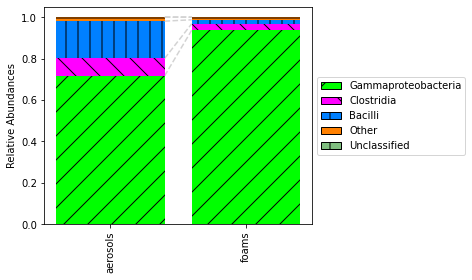

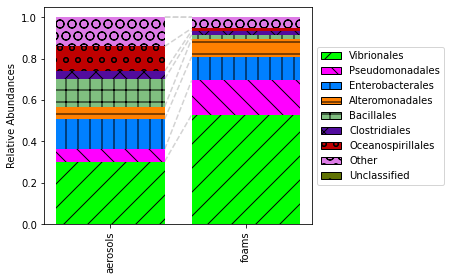

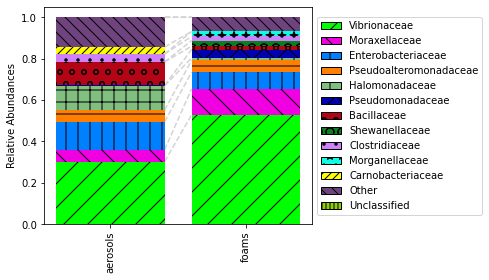

In [29]:
plot_rel_abundances_new(df,3,'Class',[aerosols,dispersed],['aerosols','foams'])
plot_rel_abundances_new(df,7,'Order',[aerosols,dispersed],['aerosols','foams'])
plot_rel_abundances_new(df,11,'Family',[aerosols,dispersed],['aerosols','foams'])

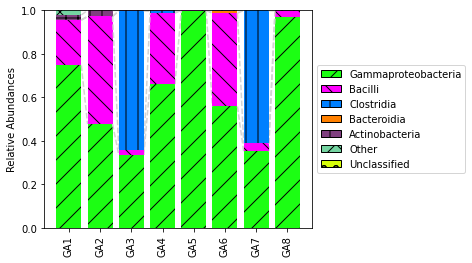

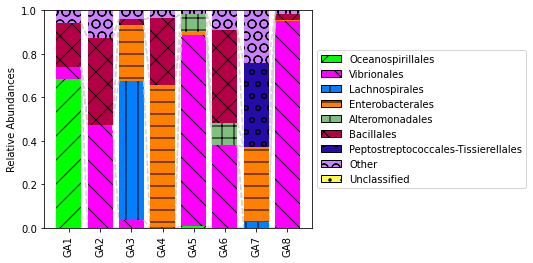

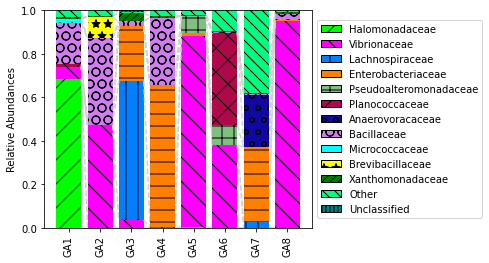

In [30]:
plot_rel_abundances_new(df,5,'Class',granda,granda)
plot_rel_abundances_new(df,7,'Order',granda,granda)
plot_rel_abundances_new(df,11,'Family',granda,granda)

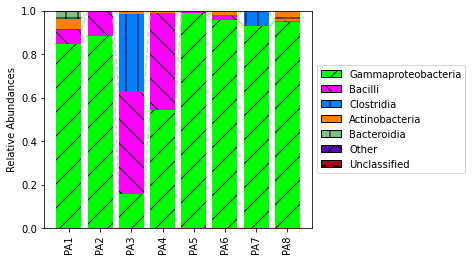

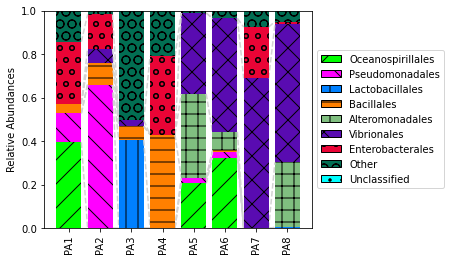

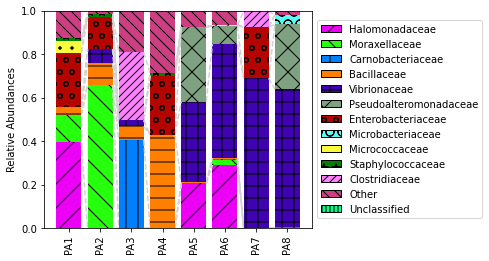

In [31]:
plot_rel_abundances_new(df,5,'Class',planka,planka)
plot_rel_abundances_new(df,7,'Order',planka,planka)
plot_rel_abundances_new(df,11,'Family',planka,planka)

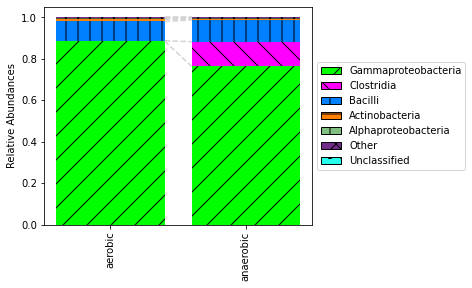

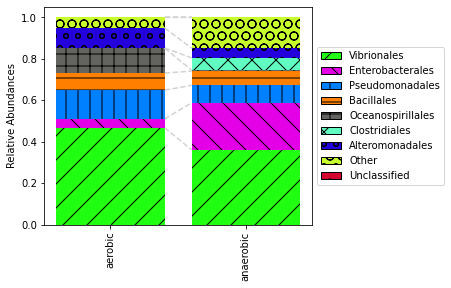

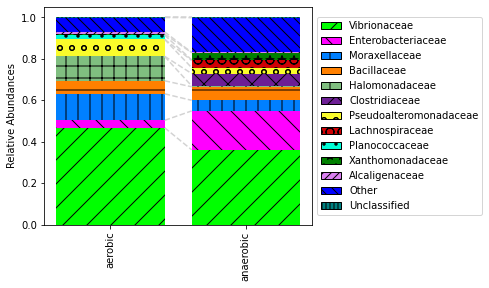

In [32]:
plot_rel_abundances_new(df,5,'Class',[aerobic,anaerobic],['aerobic','anaerobic'])
plot_rel_abundances_new(df,7,'Order',[aerobic,anaerobic],['aerobic','anaerobic'])
plot_rel_abundances_new(df,11,'Family',[aerobic,anaerobic],['aerobic','anaerobic'])

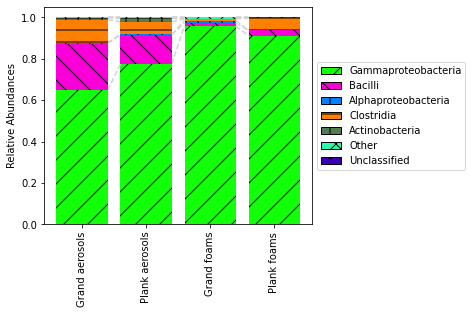

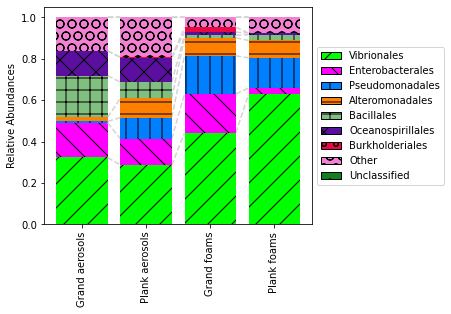

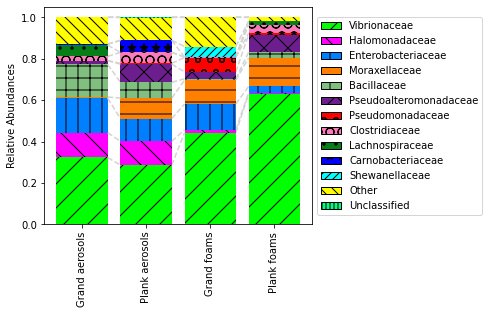

In [33]:
plot_rel_abundances_new(df,5,'Class',[granda,planka,grandd,plankd],['Grand aerosols','Plank aerosols','Grand foams','Plank foams'])
plot_rel_abundances_new(df,7,'Order',[granda,planka,grandd,plankd],['Grand aerosols','Plank aerosols','Grand foams','Plank foams'])
plot_rel_abundances_new(df,11,'Family',[granda,planka,grandd,plankd],['Grand aerosols','Plank aerosols','Grand foams','Plank foams'])

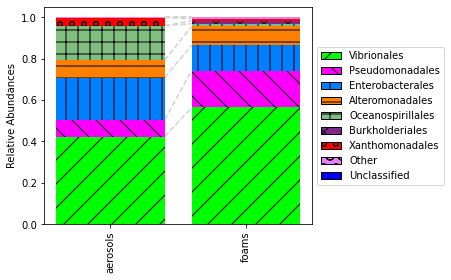

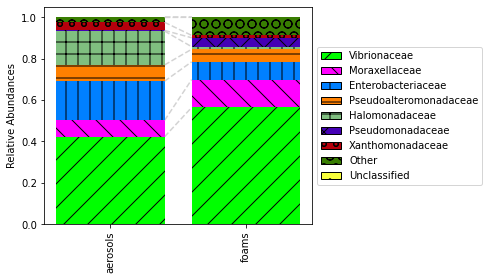

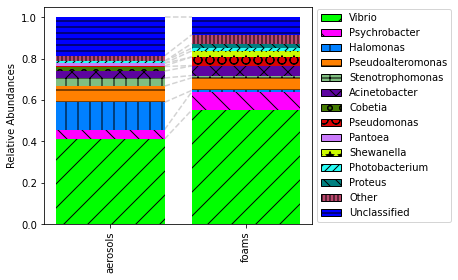

In [42]:
plot_rel_abundances_new(df[df['Class'] == 'Gammaproteobacteria'],7,'Order',[aerosols,dispersed],['aerosols','foams'])
plot_rel_abundances_new(df[df['Class'] == 'Gammaproteobacteria'],7,'Family',[aerosols,dispersed],['aerosols','foams'])
plot_rel_abundances_new(df[df['Class'] == 'Gammaproteobacteria'],12,'Genus',[aerosols,dispersed],['aerosols','foams'])

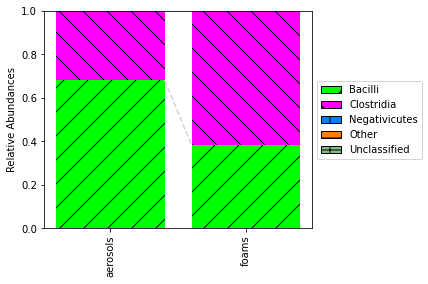

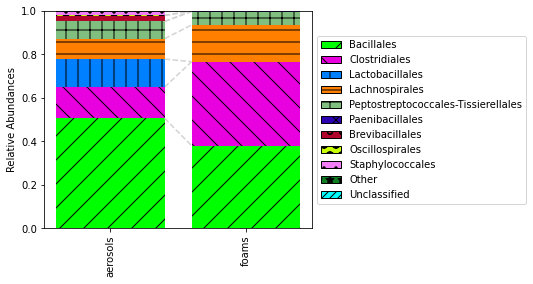

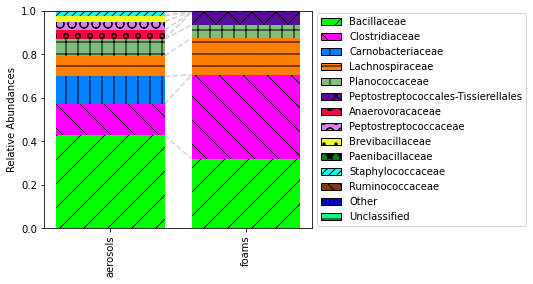

In [47]:
plot_rel_abundances_new(df[df['Phylum'] == 'Firmicutes'],7,'Class',[aerosols,dispersed],['aerosols','foams'])
plot_rel_abundances_new(df[df['Phylum'] == 'Firmicutes'],9,'Order',[aerosols,dispersed],['aerosols','foams'])
plot_rel_abundances_new(df[df['Phylum'] == 'Firmicutes'],12,'Family',[aerosols,dispersed],['aerosols','foams'])

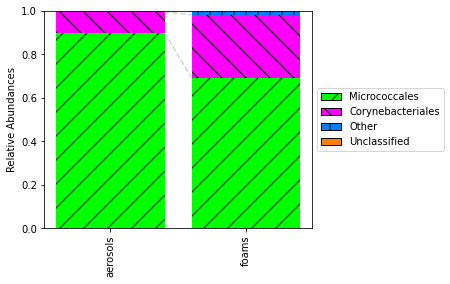

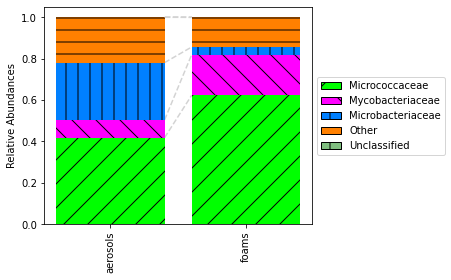

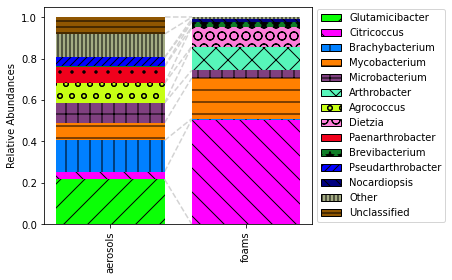

In [51]:
plot_rel_abundances_new(df[df['Class'] == 'Actinobacteria'],2,'Order',[aerosols,dispersed],['aerosols','foams'])
plot_rel_abundances_new(df[df['Class'] == 'Actinobacteria'],3,'Family',[aerosols,dispersed],['aerosols','foams'])
plot_rel_abundances_new(df[df['Class'] == 'Actinobacteria'],12,'Genus',[aerosols,dispersed],['aerosols','foams'])

In [72]:
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

def plot_abundances_new(df,num,taxa,column_names,labels,log=False):
    #first create relative abundances
    if any(isinstance(el, list) for el in column_names):
        flat_list = [item for sublist in column_names for item in sublist]
    else:
        flat_list = column_names
    res = [*set(flat_list)]
    identify_rows = df[res]
    all_possible = identify_rows.sum(axis=1)
    just_this = df[all_possible != 0]
    unique_things = just_this[taxa].unique()
    unique_things = unique_things[unique_things != np.array(None)]
    unique_things = unique_things[unique_things != '']
    unique_things = unique_things[unique_things != 'Unassigned']
    if num > len(unique_things) : 
        num = len(unique_things)
    df_rel = np.zeros([len(column_names),len(just_this)])
    rel_array = np.zeros([len(column_names),len(unique_things)])
    most_common = []
    rel_plot = np.zeros([len(column_names),num+2])
    for index,column_name in enumerate(column_names) :
        subf = pd.DataFrame(just_this[column_name])
        full_counts = subf.sum(axis=1)
        df_rel[index,:] = np.array(full_counts)
        for ind,thing in enumerate(unique_things):
            rel_array[index,ind]=sum(df_rel[index,just_this[taxa] == thing])
    stream = 0
    for index in range(num):
        while max(rel_array[stream % len(column_names),:]) == 0:
            stream += 1
        candidates = list(rel_array[stream % len(column_names),:]==max(rel_array[stream % len(column_names),:]))
        stream += 1
        organisms = unique_things[candidates]
        thing_to_append = organisms[0]
        numbers = rel_array[:,candidates]
        number_to_include = numbers[:,0]
        zero = candidates.index(True)
        most_common.append(thing_to_append)
        rel_plot[:,index] = number_to_include
        rel_array[:,zero] = np.zeros(len(column_names))
    if log == True:
        most_common.reverse()
    most_common.append('Other')
   # most_common.append('Unclassified')
    for index in range(len(column_names)):
        rel_plot[index,num] = sum(rel_array[index,:])
        #rel_plot[index,num+1] = 1.0-sum(rel_plot[index,0:num+1])
    ysum = np.zeros(len(column_names))
    colors = distinctipy.get_colors(num+2)
    hatches = ['/' , '\\' , '|' , '-' , '+' , 'x', 'o', 'O', '.', '*','///','\\\\','|||','--','++','xx','oo','OO','..','**']
    fig = plt.figure()
    ax = plt.subplot(111)
    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    save_patch = []
    for ind,thing in enumerate(most_common):   
        ax.bar(labels,rel_plot[:,ind], bottom=ysum, color=colors[ind], hatch = hatches[ind])
        a = rel_plot[:,ind]
        b = ysum
        w = ax.patches[0].get_width()
        save_patch.append(mpatches.Patch(edgecolor='k', facecolor=colors[ind],hatch=hatches[ind]))
        for i in range(0, len(labels) - 1):
            #ax.plot([i + w / 2, i + 1 - w / 2], [a[i], a[i + 1]], color='C7', ls='--', zorder=1)
            ax.plot([i + w / 2, i + 1 - w / 2], [a[i] + b[i], a[i + 1] + b[i + 1]], color='lightgray', ls='--', zorder=1) # **
        ysum += rel_plot[:,ind]
    ax.set_ylabel("Abundances")
    if log == True:
        ax.set_yscale('log')
    # Put a legend to the right of the current axis
    print(most_common)
    ax.legend(save_patch,most_common, loc='center left', bbox_to_anchor=(1, 0.5))
    ax.xaxis.set_ticks(labels)
    ax.set_xticklabels(labels, rotation = 90)
    plt.show()

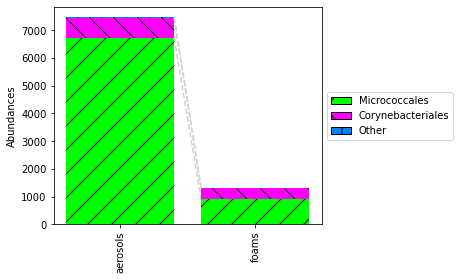

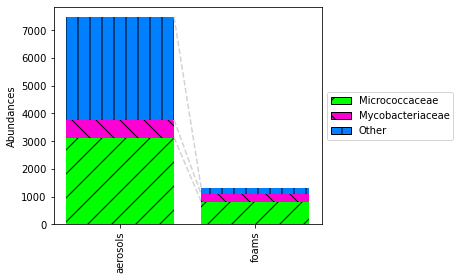

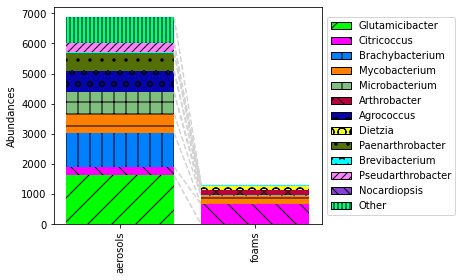

In [56]:
plot_abundances_new(df[df['Class'] == 'Actinobacteria'],2,'Order',[aerosols,dispersed],['aerosols','foams'])
plot_abundances_new(df[df['Class'] == 'Actinobacteria'],2,'Family',[aerosols,dispersed],['aerosols','foams'])
plot_abundances_new(df[df['Class'] == 'Actinobacteria'],12,'Genus',[aerosols,dispersed],['aerosols','foams'])

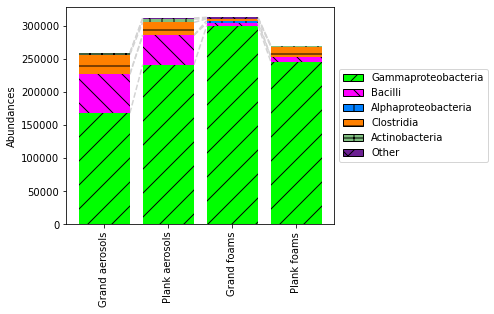

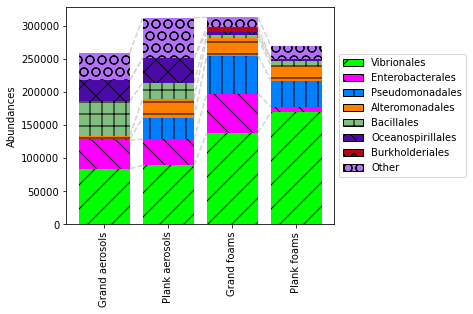

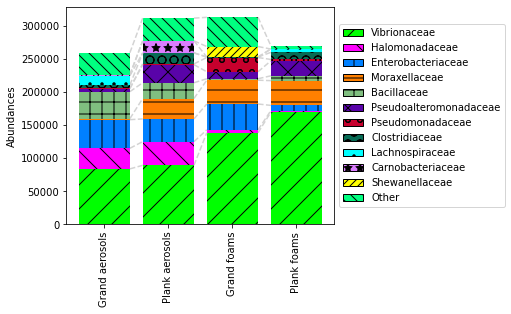

In [57]:
plot_abundances_new(df,5,'Class',[granda,planka,grandd,plankd],['Grand aerosols','Plank aerosols','Grand foams','Plank foams'])
plot_abundances_new(df,7,'Order',[granda,planka,grandd,plankd],['Grand aerosols','Plank aerosols','Grand foams','Plank foams'])
plot_abundances_new(df,11,'Family',[granda,planka,grandd,plankd],['Grand aerosols','Plank aerosols','Grand foams','Plank foams'])

['Lachnospiraceae', 'Clostridiaceae', 'Peptostreptococcales-Tissierellales', 'Ruminococcaceae', 'Oscillospiraceae', 'Anaerovoracaceae', 'Other']


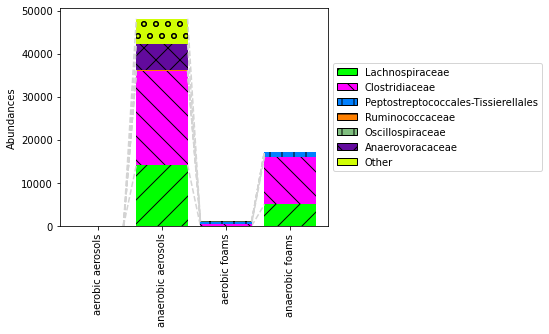

In [75]:
plot_abundances_new(df[df['Class'] == 'Clostridia'],6,'Family',\
                    [aerosol_aerobic,aerosol_anaerobic,foam_aerobic,foam_anaerobic],\
                    ['aerobic aerosols','anaerobic aerosols','aerobic foams','anaerobic foams'],log=False)

In [66]:
aerosol_aerobic = ['GA1','GA2','GA5','GA6','PA1','PA2','PA5','PA6']
aerosol_anaerobic = ['GA3','GA4','GA7','GA8','PA3','PA4','PA7','PA8']
foam_aerobic = ['GD1','GD2','GD5','GD6','PD1','PD2','PD5','PD6']
foam_anaerobic = ['GD3','GD4','GD7','GD8','PD3','PD4','PD7','PD8']

In [76]:
df[df['Genus'] == 'Clostridioides']

,Feature ID,GW-A,PW-A,GW+A,PW+A,GW+B,PW+B,GW-B,PW-B,GF+B,...,PD8,Taxon,Confidence,Domain,Phylum,Class,Order,Family,Genus,Species
133,3ae24c49e59510ddb93be7911b3903c2dcb577db,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,d__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.999971,Bacteria,Firmicutes,Clostridia,Peptostreptococcales-Tissierellales,Peptostreptococcaceae,Clostridioides,None
4979,ceff4e448243617215cd93e6fe8576659835150e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,d__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.999976,Bacteria,Firmicutes,Clostridia,Peptostreptococcales-Tissierellales,Peptostreptococcaceae,Clostridioides,None


['Clostridioides', 'Terrisporobacter', 'Paraclostridium', 'Other']


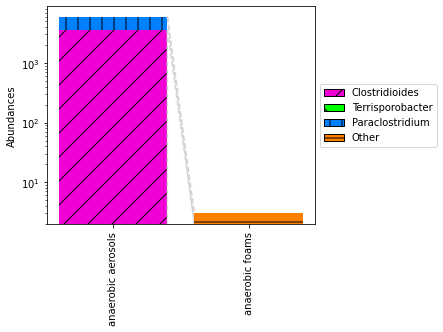

In [88]:
plot_abundances_new(df[df['Family'] == 'Peptostreptococcaceae'],3,'Genus',\
                    [aerosol_anaerobic,foam_anaerobic],\
                    ['anaerobic aerosols','anaerobic foams'],log=True)